In [ ]:
## The goal of this notebook is to bring awareness and provide information about changes in climate, ocean, land, and coasts to users to facilitate the conservation 
## and management of marine and coastal ecosystems and resources using Buoy and Argo Float Data.

In [44]:
## import xarray library as one of the packages that works with multidimensional array data (x,yz,t), along side with its dependence libraries 

## import xarray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [31]:
## lets work with dataset for National Data Buoy Centre (NDBC) which is under the National Oceanography and Atmospheric Adminidtration (NOAA)

In [32]:
## load data from NDBC using Distributed Oceanographic Data Systems (DODS), a framework used by NDBC to share data from a paticular buoy station, with threrrd Server (OpenData or Hhttps) 
## A dataset contains many variables

data = xr.open_dataset('https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/44025/44025.ncml', decode_cf=True)

In [33]:
## Lets explore the data
data

<xarray.Dataset>
Dimensions:                  (latitude: 1, longitude: 1, time: 288281)
Coordinates:
  * latitude                 (latitude) float32 40.25
  * longitude                (longitude) float32 -73.16
  * time                     (time) datetime64[ns] 1975-10-24T12:00:00 ... 20...
Data variables: (12/13)
    wind_dir                 (time, latitude, longitude) float64 ...
    wind_spd                 (time, latitude, longitude) float32 ...
    gust                     (time, latitude, longitude) float32 ...
    wave_height              (time, latitude, longitude) float32 ...
    dominant_wpd             (time, latitude, longitude) timedelta64[ns] ...
    average_wpd              (time, latitude, longitude) timedelta64[ns] ...
    ...                       ...
    air_pressure             (time, latitude, longitude) float32 ...
    air_temperature          (time, latitude, longitude) float32 ...
    sea_surface_temperature  (time, latitude, longitude) float32 ...
    dewpt_temperature        (time, latitude, longitude) float32 ...
    visibility               (time, latitude, longitude) float32 ...
    water_level              (time, latitude, longitude) float32 ...
Attributes:
    institution:  NOAA National Data Buoy Center and Participators in Data As...
    url:          http://dods.ndbc.noaa.gov
    quality:      Automated QC checks with manual editing and comprehensive m...
    conventions:  COARDS
    station:      44025
    comment:      LONG ISLAND - 30 NM South of Islip, NY
    location:     40.251 N 73.164 W

In [37]:
## Lets access sea surface temperature
data.sea_surface_temperature

<xarray.DataArray 'sea_surface_temperature' (time: 288281, latitude: 1,
                                             longitude: 1)>
[288281 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 40.25
  * longitude  (longitude) float32 -73.16
  * time       (time) datetime64[ns] 1975-10-24T12:00:00 ... 2022-01-31T23:50:00
Attributes:
    long_name:      Sea Surface Temperature
    short_name:     wtmp
    standard_name:  sea_surface_temperature
    units:          degree_Celsius

In [39]:
## Lets check a metadata
data.sea_surface_temperature.long_name


'Sea Surface Temperature'

In [52]:
## Select only two consecutive years

year = data.sel(time = slice('2018-01-01','2022-01-01'))

In [53]:
year

<xarray.Dataset>
Dimensions:                  (latitude: 1, longitude: 1, time: 36617)
Coordinates:
  * latitude                 (latitude) float32 40.25
  * longitude                (longitude) float32 -73.16
  * time                     (time) datetime64[ns] 2018-01-01T00:50:00 ... 20...
Data variables: (12/13)
    wind_dir                 (time, latitude, longitude) float64 ...
    wind_spd                 (time, latitude, longitude) float32 ...
    gust                     (time, latitude, longitude) float32 ...
    wave_height              (time, latitude, longitude) float32 ...
    dominant_wpd             (time, latitude, longitude) timedelta64[ns] ...
    average_wpd              (time, latitude, longitude) timedelta64[ns] ...
    ...                       ...
    air_pressure             (time, latitude, longitude) float32 ...
    air_temperature          (time, latitude, longitude) float32 ...
    sea_surface_temperature  (time, latitude, longitude) float32 ...
    dewpt_temperature        (time, latitude, longitude) float32 ...
    visibility               (time, latitude, longitude) float32 ...
    water_level              (time, latitude, longitude) float32 ...
Attributes:
    institution:  NOAA National Data Buoy Center and Participators in Data As...
    url:          http://dods.ndbc.noaa.gov
    quality:      Automated QC checks with manual editing and comprehensive m...
    conventions:  COARDS
    station:      44025
    comment:      LONG ISLAND - 30 NM South of Islip, NY
    location:     40.251 N 73.164 W

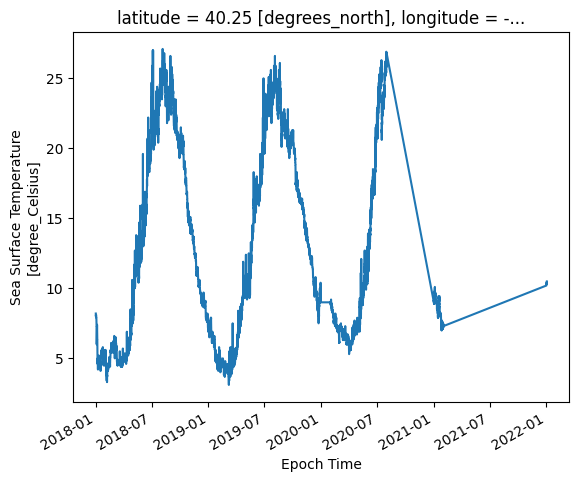

In [54]:
year.sea_surface_temperature.plot();

In [55]:
season = year.groupby('time.season').mean()

In [56]:
data_season = season.sea_surface_temperature

In [57]:
## Lets reindex the seasons as DJF, MAM, JJA
season_reindex = season.reindex(col = ['DJF','MAM', 'JJA'])
season_reindex.sea_surface_temperature

<xarray.DataArray 'sea_surface_temperature' (season: 4, latitude: 1,
                                             longitude: 1)>
array([[[ 7.6678777]],

       [[20.592897 ]],

       [[ 8.460555 ]],

       [[17.58509  ]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 40.25
  * longitude  (longitude) float32 -73.16
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'

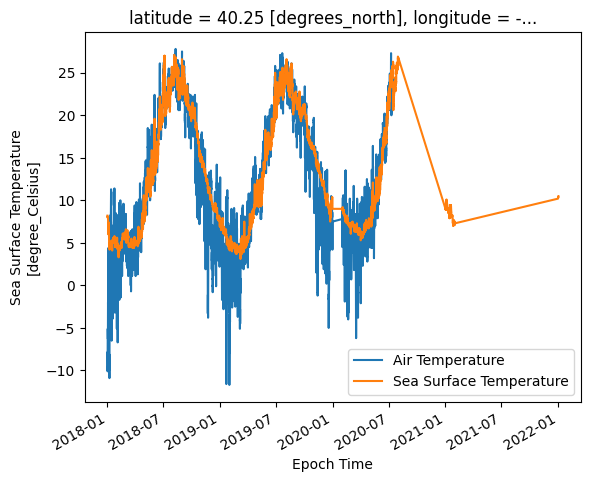

In [61]:
# We can even plot 2 variables on one graph
year.air_temperature.plot(label="Air Temperature")
year.sea_surface_temperature.plot(label="Sea Surface Temperature")
plt.legend();